Python w/JupyterNotebooks <br>
Assignment 2: Writing a simple code to solve an analytical solution <br>
Mitchell Hastings <br>
Sept. 8, 2020 <br>

<h2>2-Dimension Interseismic Strain on a Blind Fault </h2>
<h6>Reference:</h6> <br>
Segall, P., 2010. Earthquake and volcano deformation. Princeton University Press.pp 60-67.
<hr>


<h3> Welcome, Weary Geophysicists! </h3> <br>

This notebook is designed to understand the 2-dimensional strain relationships from motion on a buried (blind) fault derived from edge dislocations. The analytical expression in Segall's book for fault displacements is derived from the application of the traction form of Volterra's formula (1) to compute an infinitely long edge dislocation. 

$$
u_k(x) = \int_{\Sigma} s_i(\xi) \sigma^k_{ij}(\xi, x)n_j d \Sigma(\xi) \tag{1}
$$

This is a complex integral that describes the displacements in the k direction at a point x as a result of point force acting at $\xi$. Here $\sigma^k_{ij}(\xi,x)$ describes the state of stress at $\xi$ from the point force in the k direction acting at x. The $n_j$ term is used as a unit vector to determine sign based upon which side of the fault plane $\Sigma$ that the point x resides. In order to reduce this integral to an analytical solution, we need to descritize the model, apply the plane strain Green's functions, and make some assumptions about the nature of the dislocation (namely that the line force is parallel to the fault plane $\Sigma$). Below is a schematic of the physical system of a buried fault:

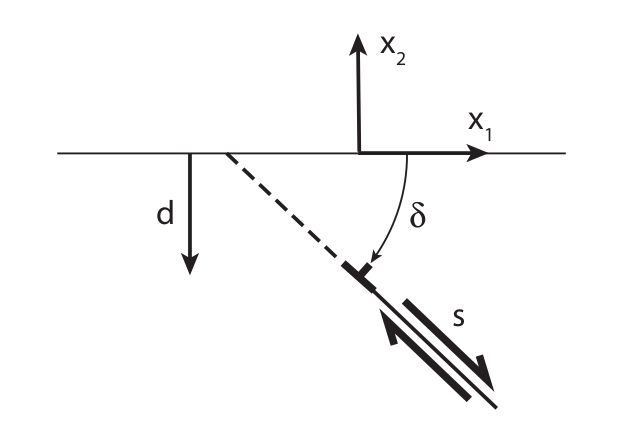

The above schematic shows a cross sectional view through a buried normal fault. The coordinate system denotes $x_1$ for the horizontal axis and $x_2$ for the vertical axis. The fault tip is buried at a depth $d$, and makes an angle $\delta$ with the horizontal plane. Lastly, $s$ is defined as the long-term slip rate on the fault. Volterra's formula and the plane strain Green's functions combine to yield the analytical expressions for horizontal $(u_1)$ and vertical $(u_2)$ displacements:

$$
u_1 (x_1, x_2 = 0) = \frac{s}{\pi} \left\{ \cos(\delta) \tan^{-1}(\zeta) + 
\frac{\sin(\delta) - \zeta \cos(\delta)}{1+\zeta^{2}} \right\} \tag{2}
$$

$$ 
u_2 (x_1, x_2 = 0) = - \frac{s}{\pi} \left\{ \sin(\delta) \tan^{-1}(\zeta) + 
\frac{\cos(\delta) + \zeta \sin(\delta)}{1+\zeta^{2}} \right\} \tag{3} 
$$ 

Here $s$ is the slip rate in mm/yr, and $\zeta$ is a the distance between the observation point and the dislocation scaled by the depth (dimensionless term):

$$
\zeta = \frac{x_1 - \xi_1}{d} \tag{4}
$$

Recall that $x_1$ is the observation point in km, $\xi_1$ is the position of the fault tip in the $x_1$ direction in km, and $d$ is the depth of the fault tip in km. This makes $\zeta$ a dimensionless term that represents the effective distance from the edge dislocation. In this formulation, when $s$ is positive the motion along the dipping fault surface is normal, conversely if $s$ is negative the motion along the dipping fault surface is reverse. 

<h3> Abstract the formulations to functions</h3> <hr>

The next cell holds the routines for computing the $u_1$ and $u_2$ displacements as described above. A simple workflow is provided to aid in visualizing the inputs.
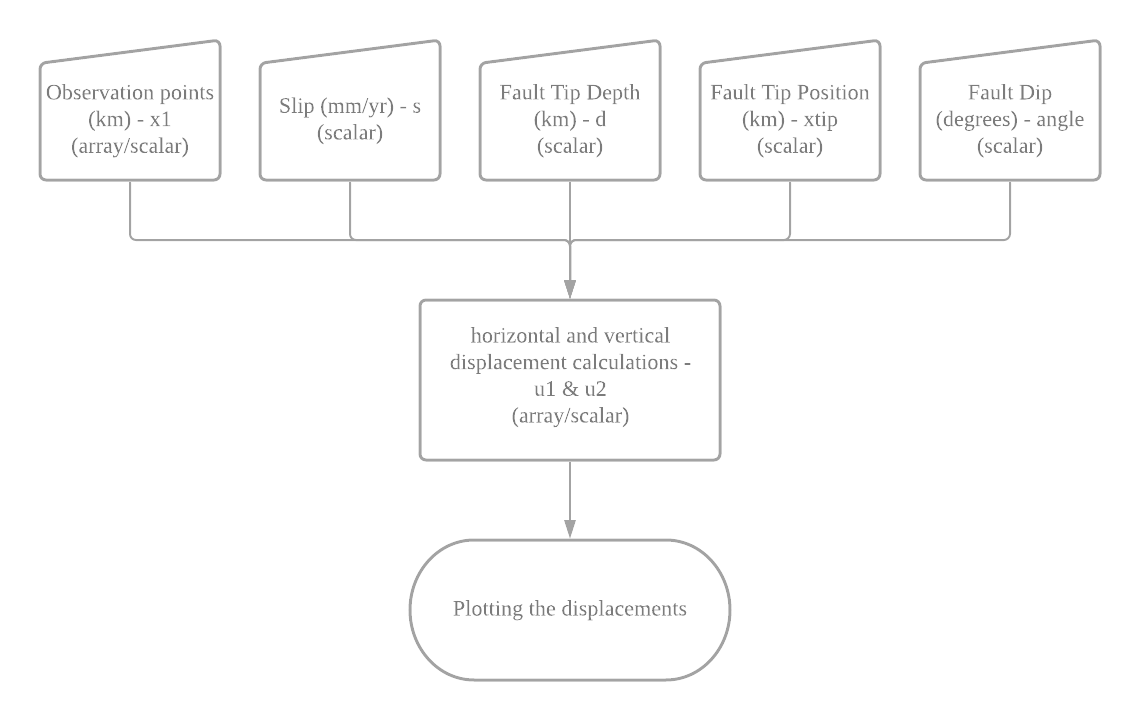

In [1]:
def u1(x1,s,d,xtip,angle):
    '''
    Function for computing the horizontal component of two dimensional edge dislocations
    of a dipping fault.
    INPUTS:
        x1 - the profile location in the x1 (along fault dip) direction (km)
             this variable can be a scalar or an array.
        s - the slip rate (mm/yr)
        d - depth to the top of the fault tip (km)
        xtip - the xposition of the fault tip (km)
        angle - angle the fault plane makes with the horizontal (degrees)
    OUTPUT:
        h - the horizontal displacement (mm/yr)
            (+) means out of the page
            (-) means into the page
    '''
    # dependencies
    from numpy import sin,cos,arctan2,pi
    
    # constants
    ang2rad = pi/180;
    
    # normalized depth
    disl = (x1-xtip)/d;

    # break up the terms to make it easier to read/debug
    term1 = cos(angle*ang2rad)*arctan2((x1-xtip),d);
    term2 = (sin(angle*ang2rad) - disl*cos(angle*ang2rad))/(1+(disl**2));
    h = (s/pi)*(term1 + term2);
    
    return h

def u2(x1,s,d,xtip,angle):
    '''
    Function for computing the vertical component of two dimensional edge dislocations
    of a dipping fault.
    INPUTS:
        x1 - the profile location in the x1 (along fault dip) direction (km)
             this variable can be a scalar or an array.
        s - the slip rate (mm/yr)
        d - depth to the top of the fault tip (km)
        xtip - the xposition of the fault tip (km)
        angle - angle the fault plane makes with the horizontal (degrees)
    OUTPUT:
        v - the vertical displacement (mm/yr)
            (+) up
            (-) down
    '''

    # dependencies
    from numpy import sin,cos,arctan2,pi
    
    # constants
    ang2rad = pi/180;
    
    # normalized depth
    disl = (x1-xtip)/d;
    
    # terms for the vertical
    term1 = sin(angle*ang2rad)*arctan2((x1-xtip),d)
    term2 = (cos(angle*ang2rad) + disl*sin(angle*ang2rad))/(1+(disl**2))
    v = -(s/pi)*(term1 + term2)
    
    return v



<h3> Implement the functions to compute interseismic strain </h3> <hr>

In [2]:
# import necessary modules
from numpy import arange

#### Example for a Normal Fault
#       (slip is positive)

# manual inputs 
x = arange(-30,30,1);      # observation points (km)
s = 30;                    # slip rate on the fault (mm/yr)
d = 5;                     # depth to the fault tip (km)
xtip = 0;                  # x location of the fault tip (km)
angle = 60;                # dip of the fault plane (degrees)

# call the functions to compute displacements
h = u1(x,s,d,xtip,angle);
v = u2(x,s,d,xtip,angle);

# print out the arrays
print("The horizontal array (h):\n",h)
print("The vertical array (v):\n",v)

The horizontal array (h):
 [-5.71369414 -5.64660965 -5.57444906 -5.49663087 -5.41248385 -5.32122967
 -5.22196128 -5.11361623 -4.99494316 -4.86445979 -4.72039971 -4.56064457
 -4.38263732 -4.18327045 -3.9587416  -3.70436643 -3.41433646 -3.08140772
 -2.69650691 -2.2482504  -1.72239973 -1.10135366 -0.36396038  0.51364918
  1.55463559  2.77229086  4.15008838  5.60698284  6.95889928  7.92756629
  8.26993343  7.97615185  7.29960664  6.55468397  5.9351963   5.49764257
  5.22399837  5.07414368  5.0099904   5.00226566  5.0303731   5.08041938
  5.14323278  5.21283386  5.28536212  5.35835312  5.43026001  5.50013883
  5.56744153  5.63187947  5.69333306  5.75179171  5.80731383  5.86000011
  5.90997571  5.9573784   6.00235072  6.04503494  6.08556979  6.12408848]
The vertical array (v):
 [ 12.83663823  12.82526458  12.81260078  12.79844717  12.78256451
  12.76466441  12.74439683  12.72133392  12.69494871  12.66458687
  12.62942885  12.5884385   12.54029271  12.48328377  12.41518203
  12.33304059  12.2

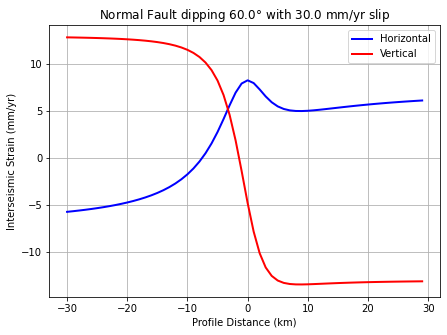

In [3]:
# import the necessary modules
from matplotlib.pyplot import figure

# declare the figure object
fig = figure(figsize=(7,5));

# declare the axes object
ax = fig.add_subplot(111);

# plot the horizontal and vertical displacements
hor = ax.plot(x,h,'b-',lw=2, label='Horizontal');
ver = ax.plot(x,v,'r-',lw=2, label='Vertical');

# add the labels, legends, grid, and title
ax.set_ylabel('Interseismic Strain (mm/yr)');
ax.set_xlabel('Profile Distance (km)');
ax.set_title("Normal Fault dipping %3.1f$\degree$ with %3.1f mm/yr slip" % (angle,s))
ax.grid(True)
ax.legend();

In [4]:
#### Example for a Thrust Fault
#       (slip is negative)

# manual inputs 
x = arange(-30,30,1);      # observation points (km)
s = -20;                   # slip rate on the fault (mm/yr)
d = 5;                     # depth to the fault tip (km)
xtip = 0;                  # x location of the fault tip (km)
angle = 30;                # dip of the fault plane (degrees)

# call the functions to compute displacements
h = u1(x,s,d,xtip,angle);
v = u2(x,s,d,xtip,angle);

# print out the arrays
print("The horizontal array (h):\n",h)
print("The vertical array (v):\n",v)

The horizontal array (h):
 [ 6.7696651   6.70392489  6.63354979  6.55804345  6.47683788  6.38928052
  6.29461838  6.1919787   6.08034517  5.95852856  5.82513031  5.67849725
  5.51666502  5.33728751  5.13754876  4.91405369  4.66269426  4.37848945
  4.05540321  3.6861583   3.26209544  2.77319539  2.20852303  1.55763149
  0.81395888 -0.01806689 -0.9102814  -1.79335837 -2.54734326 -3.0326211
 -3.18309886 -3.08872287 -2.94075823 -2.88766937 -2.97154648 -3.16503197
 -3.4230563  -3.70837397 -3.99678082 -4.27465712 -4.53533499 -4.77626065
 -4.99714844 -5.19887576 -5.38285237 -5.55067346 -5.70393646 -5.84415039
 -5.97269638 -6.09081575 -6.19961253 -6.30006277 -6.39302679 -6.47926199
 -6.55943526 -6.63413428 -6.70387774 -6.76912427 -6.83028025 -6.88770658]
The vertical array (v):
 [-4.84148582 -4.83034023 -4.81798996 -4.80425704 -4.78892985 -4.77175524
 -4.75242853 -4.73058062 -4.70576122 -4.67741689 -4.64486202 -4.60724004
 -4.56347109 -4.51218074 -4.4516017  -4.37943694 -4.29266702 -4.1872762


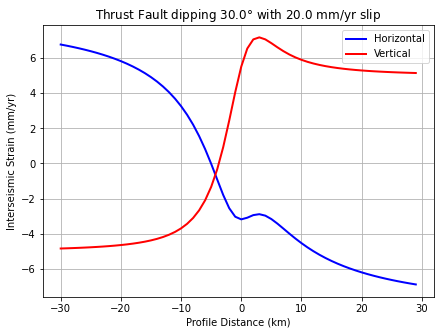

In [5]:
# declare the figure object
fig2 = figure(figsize=(7,5));

# declare the axes object
ax2 = fig2.add_subplot(111);

# plot the horizontal and vertical displacements
hor2 = ax2.plot(x,h,'b-',lw=2, label='Horizontal');
ver2 = ax2.plot(x,v,'r-',lw=2, label='Vertical');

# add the labels, legends, grid, and title
ax2.set_ylabel('Interseismic Strain (mm/yr)');
ax2.set_xlabel('Profile Distance (km)');
ax2.set_title("Thrust Fault dipping %3.1f$\degree$ with %3.1f mm/yr slip" % (angle,-s))
ax2.grid(True)
ax2.legend();